In [4]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
import statistics

In [5]:
data_base = pd.read_csv('./../XAUUSD_2010-2023.csv')

In [6]:
data_head = data_base.head(100_000)

In [7]:
#Refactor 
def cari_statika(data, name):
    mean = statistics.mean(data)
    median = statistics.median(data)
    modus = statistics.mode(data)
    varian = statistics.variance(data)
    Q1 = data.quantile(.25)
    Q3 = data.quantile(.75)
    return {
        "name": name,
        "mean": mean,
        "median": median,
        "modus": modus,
        "varian": varian,
        "Q1": Q1,
        "Q3": Q3,
    }


data_statik = cari_statika(data_head['open'], 'open')
data_statik

{'name': 'open',
 'mean': 1282.214728,
 'median': 1256.94,
 'modus': 1236.73,
 'varian': 16008.289178859804,
 'Q1': 1176.63,
 'Q3': 1385.35}

In [26]:
# data_statik.update({'name': 'open'})
# data_statik

{'mean': 1122.03213,
 'median': 1122.45,
 'modus': 1122.43,
 'varian': 109.64945501811815,
 'Q1': 1118.1725000000001,
 'Q3': 1129.63,
 'name': 'open'}

In [8]:
new_data = pd.DataFrame.from_dict([data_statik])
new_data

,name,mean,median,modus,varian,Q1,Q3
0,open,1282.214728,1256.94,1236.73,16008.289179,1176.63,1385.35


In [9]:
delete_data = data_head.copy()
column_data = delete_data.drop(columns=['time']).columns
column_data

Index(['open', 'high', 'low', 'close', 'rsi14', 'sma14'], dtype='object')

In [10]:
data_loop = list(column_data)
result_data = []
for i in data_loop:
    result_data.append(
        cari_statika(data_head[str(i)], str(i))

    )
result_data

[{'name': 'open',
  'mean': 1282.214728,
  'median': 1256.94,
  'modus': 1236.73,
  'varian': 16008.289178859804,
  'Q1': 1176.63,
  'Q3': 1385.35},
 {'name': 'high',
  'mean': 1282.6795464,
  'median': 1257.3,
  'modus': 1373.08,
  'varian': 16015.864401726265,
  'Q1': 1177.08,
  'Q3': 1385.78},
 {'name': 'low',
  'mean': 1281.7461508000001,
  'median': 1256.58,
  'modus': 1195.18,
  'varian': 16000.509415471814,
  'Q1': 1176.1175,
  'Q3': 1384.93},
 {'name': 'close',
  'mean': 1282.2182613,
  'median': 1256.94,
  'modus': 1427.08,
  'varian': 16008.479313985063,
  'Q1': 1176.63,
  'Q3': 1385.35},
 {'name': 'rsi14',
  'mean': 50.9297892,
  'median': 51.04,
  'modus': 51.17,
  'varian': 125.38615567512011,
  'Q1': 43.66,
  'Q3': 58.37},
 {'name': 'sma14',
  'mean': 1282.1910624,
  'median': 1256.95,
  'modus': 1340.06,
  'varian': 16005.806338080687,
  'Q1': 1176.775,
  'Q3': 1385.35}]

In [11]:
static_data = pd.DataFrame.from_dict(result_data)
static_data

,name,mean,median,modus,varian,Q1,Q3
0,open,1282.214728,1256.94,1236.73,16008.289179,1176.6300,1385.35
1,high,1282.679546,1257.30,1373.08,16015.864402,1177.0800,1385.78
2,low,1281.746151,1256.58,1195.18,16000.509415,1176.1175,1384.93
3,close,1282.218261,1256.94,1427.08,16008.479314,1176.6300,1385.35
4,rsi14,50.929789,51.04,51.17,125.386156,43.6600,58.37
5,sma14,1282.191062,1256.95,1340.06,16005.806338,1176.7750,1385.35


In [12]:
static_group = static_data.groupby('name').sum()
static_group

,mean,median,modus,varian,Q1,Q3
name,,,,,,
close,1282.218261,1256.94,1427.08,16008.479314,1176.6300,1385.35
high,1282.679546,1257.30,1373.08,16015.864402,1177.0800,1385.78
low,1281.746151,1256.58,1195.18,16000.509415,1176.1175,1384.93
open,1282.214728,1256.94,1236.73,16008.289179,1176.6300,1385.35
rsi14,50.929789,51.04,51.17,125.386156,43.6600,58.37
sma14,1282.191062,1256.95,1340.06,16005.806338,1176.7750,1385.35


<Axes: xlabel='name'>

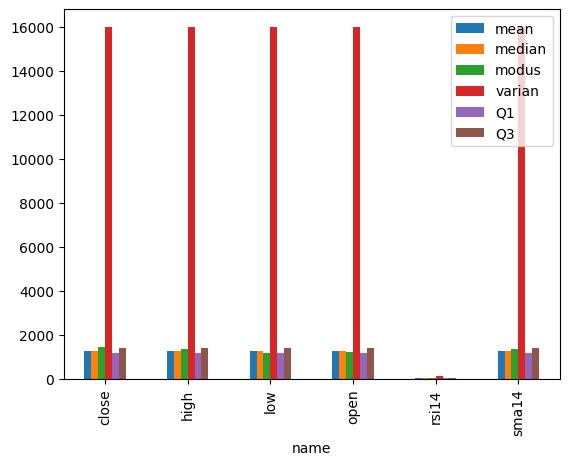

In [13]:
static_group.plot.bar()

In [14]:
data_transpose = static_group.transpose()
data_transpose

name,close,high,low,open,rsi14,sma14
mean,1282.218261,1282.679546,1281.746151,1282.214728,50.929789,1282.191062
median,1256.940000,1257.300000,1256.580000,1256.940000,51.040000,1256.950000
modus,1427.080000,1373.080000,1195.180000,1236.730000,51.170000,1340.060000
varian,16008.479314,16015.864402,16000.509415,16008.289179,125.386156,16005.806338
Q1,1176.630000,1177.080000,1176.117500,1176.630000,43.660000,1176.775000
Q3,1385.350000,1385.780000,1384.930000,1385.350000,58.370000,1385.350000


<Axes: >

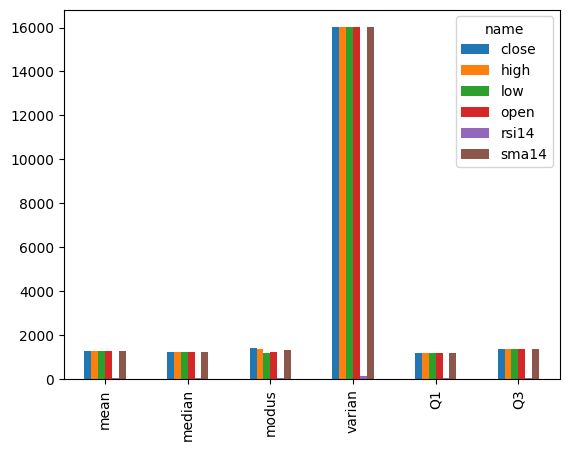

In [15]:
data_transpose.plot.bar()

In [16]:
type(static_data)

pandas.core.frame.DataFrame

<Axes: >

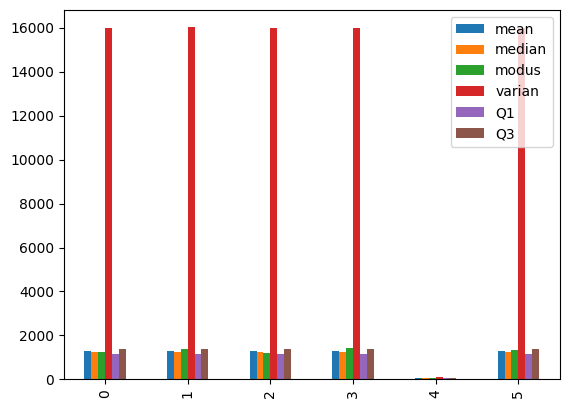

In [17]:
static_data.plot.bar()

In [18]:
visual_data = data_head.copy()
visual_data.drop(columns=['time'])
databaru = visual_data.drop(
    columns=
    ['time', 'rsi14', 'sma14'])
databaru


,open,high,low,close
0,1098.45,1100.00,1098.05,1099.95
1,1100.00,1100.30,1099.45,1099.75
2,1099.70,1100.10,1099.30,1099.45
3,1099.50,1099.60,1098.50,1099.45
4,1099.40,1099.60,1098.90,1098.90
...,...,...,...,...
99995,1514.23,1514.83,1513.88,1514.73
99996,1514.78,1515.53,1514.58,1515.23
99997,1515.18,1515.88,1515.13,1515.43
99998,1515.38,1516.78,1515.38,1516.63


<Axes: >

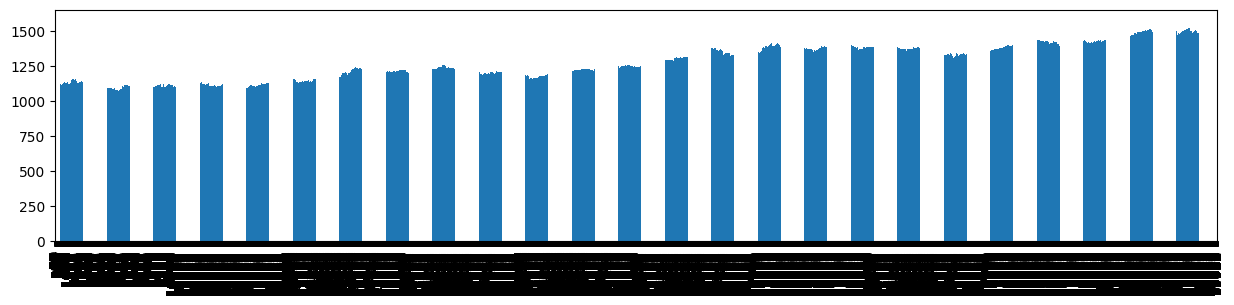

In [19]:
visual_data['open'].plot.bar(figsize=(15, 3))

In [ ]:
# databaru.plot.bar(figsize=(15, 3))

In [ ]:
# databaru.plot.bar(stacked=True,figsize=(15, 3) )

<Axes: >

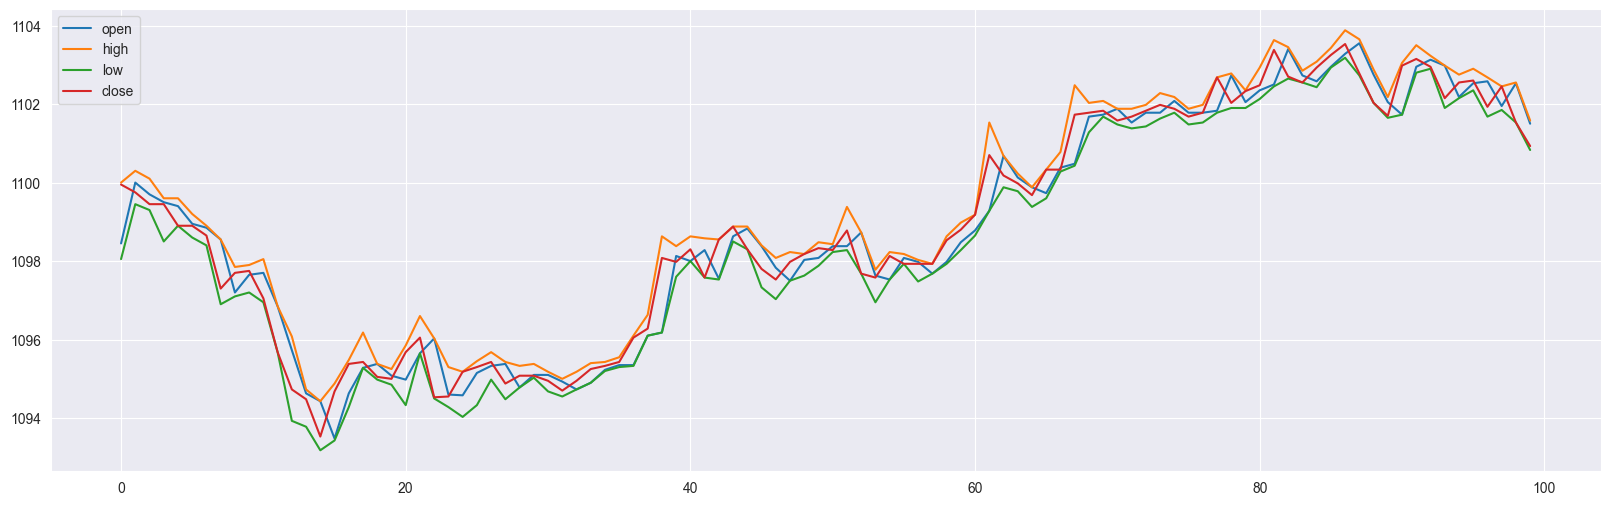

In [23]:
databaru.plot.line(figsize=(20, 6))

In [ ]:
databaru.plot.line(y='open', color='red', lw=2, figsize=(15, 3))

In [ ]:
databaru.plot.line(y='low', color='red', lw=2, figsize=(15, 3))

In [ ]:
databaru.plot.line(y='high', color='red', lw=2, figsize=(15, 3))

<Axes: >

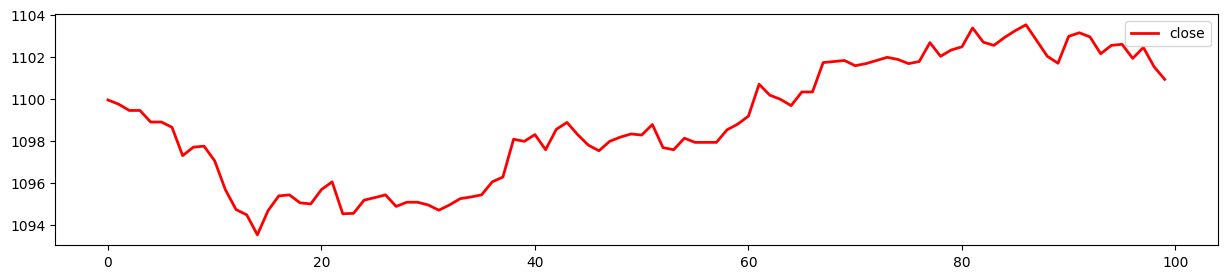

In [130]:
databaru.plot.line(y='close', color='red', lw=2, figsize=(15, 3))

<Axes: >

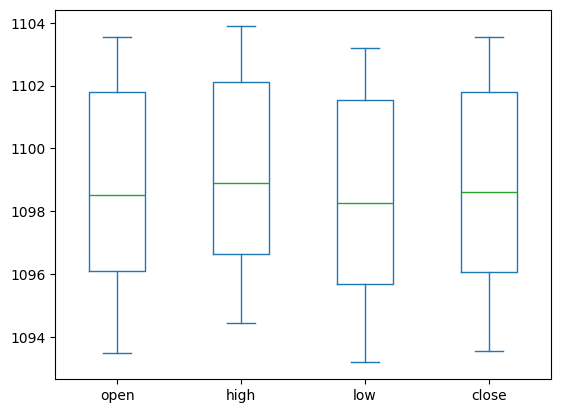

In [131]:
databaru.plot.box()

<Axes: xlabel='open', ylabel='close'>

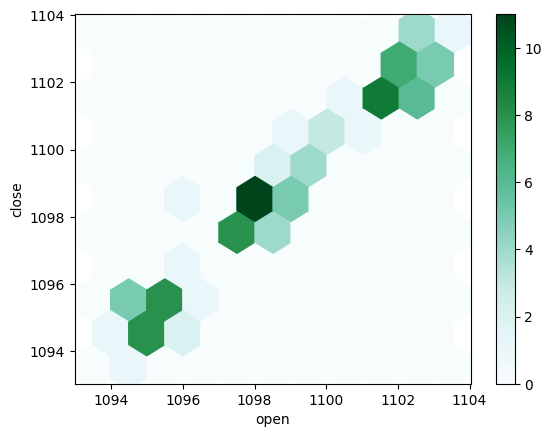

In [132]:
databaru.plot.hexbin(x='open', y='close', gridsize=10)

<Axes: xlabel='low', ylabel='high'>

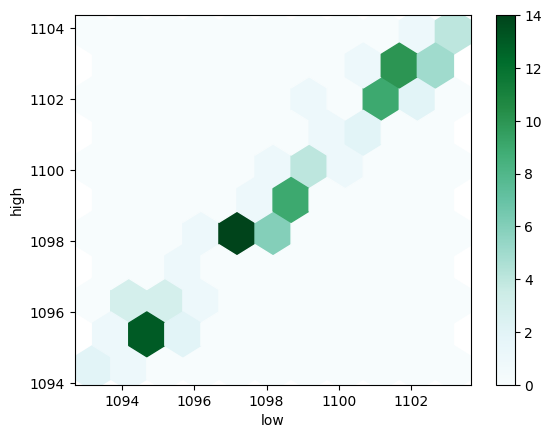

In [133]:
databaru.plot.hexbin(x='low', y='high', gridsize=10)

<Axes: xlabel='low', ylabel='high'>

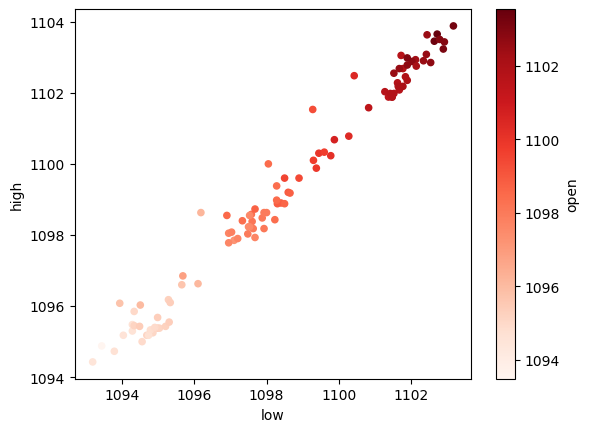

In [134]:
databaru.plot.scatter(
    x='low',  #colom A 
    y='high',  #colom B
    c='open',  #Warna berdasarkan nilai kolom E
    cmap='Reds'  # Ubah warna
)

<Axes: xlabel='low', ylabel='high'>

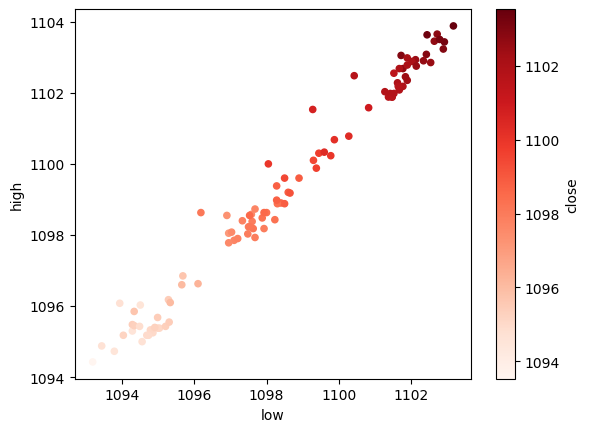

In [135]:
databaru.plot.scatter(
    x='low',  #colom A 
    y='high',  #colom B
    c='close',  #Warna berdasarkan nilai kolom E
    cmap='Reds'  # Ubah warna
)

<Axes: xlabel='open', ylabel='close'>

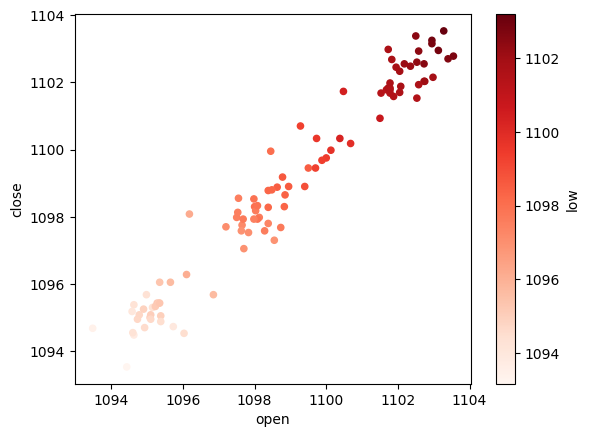

In [136]:
databaru.plot.scatter(
    x='open',  #colom A 
    y='close',  #colom B
    c='low',  #Warna berdasarkan nilai kolom E
    cmap='Reds'  # Ubah warna
)

<Axes: xlabel='open', ylabel='close'>

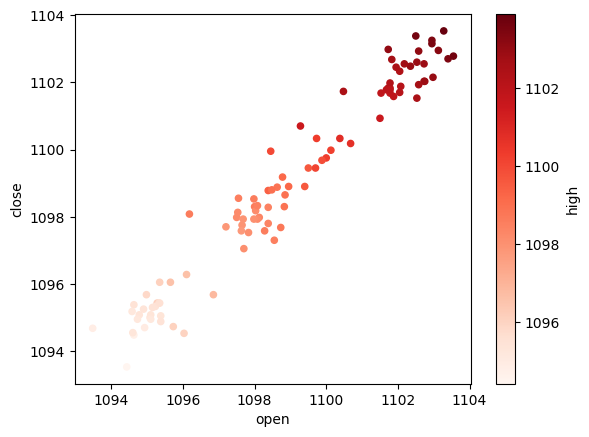

In [137]:
databaru.plot.scatter(
    x='open',  #colom A 
    y='close',  #colom B
    c='high',  #Warna berdasarkan nilai kolom E
    cmap='Reds'  # Ubah warna
)